# Signal processing

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import os
import scipy
import scipy.signal as signal


In [ ]:
data_date = "2025_12_25" # Lưu ý: Bạn nên sửa lại thành ngày đúng của dữ liệu nếu cần
data_path = "D:\\DLITE\\Sun_Observering_Interferometry\\Signal_Processing\\" + data_date

# 1. Lấy danh sách tất cả các file
all_files = os.listdir(data_path)
all_files.sort()

# --- PHẦN MỚI THÊM VÀO: CẤU HÌNH GIỜ LỌC ---
start_hour = 10   # Giờ bắt đầu muốn xem (Ví dụ: 10 giờ)
stop_hour = 14    # Giờ kết thúc (Ví dụ: 11 giờ - tức là lấy đến 10:59:59)

file_list = []

for file in all_files:
    # Tên file mẫu: 2025_03_20_10_00_05_5_PSD.csv
    # Khi tách chuỗi bằng dấu "_", vị trí số 3 chính là Giờ (index 3)
    try:
        parts = file.split('_')
        file_hour = int(parts[3]) 
        
        # Kiểm tra điều kiện: Giờ file >= Giờ bắt đầu VÀ Giờ file < Giờ kết thúc
        if (file_hour >= start_hour) and (file_hour < stop_hour):
            file_list.append(file)
    except:
        pass # Bỏ qua các file không đúng định dạng tên

# Cập nhật lại số lượng file để các Cell sau chạy đúng
number_file = len(file_list)

print(f"Tổng số file tìm thấy: {len(all_files)}")
print(f"Số file sau khi lọc ({start_hour}h - {stop_hour}h): {number_file}")
file_list # Hiển thị danh sách file để kiểm tra

Tổng số file tìm thấy: 8673
Số file sau khi lọc (10h - 14h): 1446


['2025_12_24_10_00_00_5_PSD.csv',
 '2025_12_24_10_00_10_5_PSD.csv',
 '2025_12_24_10_00_20_4_PSD.csv',
 '2025_12_24_10_00_30_4_PSD.csv',
 '2025_12_24_10_00_40_4_PSD.csv',
 '2025_12_24_10_00_50_3_PSD.csv',
 '2025_12_24_10_01_00_3_PSD.csv',
 '2025_12_24_10_01_10_3_PSD.csv',
 '2025_12_24_10_01_20_2_PSD.csv',
 '2025_12_24_10_01_30_2_PSD.csv',
 '2025_12_24_10_01_40_2_PSD.csv',
 '2025_12_24_10_01_50_1_PSD.csv',
 '2025_12_24_10_02_00_1_PSD.csv',
 '2025_12_24_10_02_10_0_PSD.csv',
 '2025_12_24_10_02_20_0_PSD.csv',
 '2025_12_24_10_02_30_0_PSD.csv',
 '2025_12_24_10_02_39_9_PSD.csv',
 '2025_12_24_10_02_49_9_PSD.csv',
 '2025_12_24_10_02_59_8_PSD.csv',
 '2025_12_24_10_03_09_8_PSD.csv',
 '2025_12_24_10_03_19_8_PSD.csv',
 '2025_12_24_10_03_29_7_PSD.csv',
 '2025_12_24_10_03_39_7_PSD.csv',
 '2025_12_24_10_03_49_6_PSD.csv',
 '2025_12_24_10_03_59_6_PSD.csv',
 '2025_12_24_10_04_09_6_PSD.csv',
 '2025_12_24_10_04_19_5_PSD.csv',
 '2025_12_24_10_04_29_5_PSD.csv',
 '2025_12_24_10_04_39_4_PSD.csv',
 '2025_12_24_1

In [21]:
Frequency =  np.loadtxt(os.path.join(data_path, file_list[0]), delimiter=',')[:,0]

print(Frequency)

[609.5    609.502  609.5039 609.5059 609.5078 609.5098 609.5117 609.5137
 609.5156 609.5176 609.5195 609.5215 609.5234 609.5254 609.5273 609.5293
 609.5312 609.5332 609.5352 609.5371 609.5391 609.541  609.543  609.5449
 609.5469 609.5488 609.5508 609.5527 609.5547 609.5566 609.5586 609.5605
 609.5625 609.5645 609.5664 609.5684 609.5703 609.5723 609.5742 609.5762
 609.5781 609.5801 609.582  609.584  609.5859 609.5879 609.5898 609.5918
 609.5938 609.5957 609.5977 609.5996 609.6016 609.6035 609.6055 609.6074
 609.6094 609.6113 609.6133 609.6152 609.6172 609.6191 609.6211 609.623
 609.625  609.627  609.6289 609.6309 609.6328 609.6348 609.6367 609.6387
 609.6406 609.6426 609.6445 609.6465 609.6484 609.6504 609.6523 609.6543
 609.6562 609.6582 609.6602 609.6621 609.6641 609.666  609.668  609.6699
 609.6719 609.6738 609.6758 609.6777 609.6797 609.6816 609.6836 609.6855
 609.6875 609.6895 609.6914 609.6934 609.6953 609.6973 609.6992 609.7012
 609.7031 609.7051 609.707  609.709  609.7109 609.71

In [22]:
# Get time form name file
time_list = np.zeros(number_file)
time1_list = ["" for i in range(number_file)]

for file in file_list:
    # Split the string into its components
    components = file.split("_")
    # Extract the date and time components
    date_str = f"{components[0]}-{components[1]}-{components[2]}"
    time_str = f"{components[3]}:{components[4]}:{components[5]}"
    time1_list[file_list.index(file)] = time_str
    # Combine the date and time components into a single string
    dateTime_str = f"{date_str} {time_str}"
    
    # Parse the string into a datetime object
    dateTime = datetime.datetime.strptime(dateTime_str, '%Y-%m-%d %H:%M:%S')
    time_list[file_list.index(file)] = dateTime.timestamp()

print(time_list.max())
print(time_list.min())

1766559594.0
1766545200.0


In [23]:
power_list = np.zeros(number_file)
data_matrix = np.zeros((len(Frequency), number_file))

for file in file_list:
    data = np.loadtxt(os.path.join(data_path, file), delimiter=',')
    data_matrix[:, file_list.index(file)] = data[:, 1]
    power_list[file_list.index(file)] = data[:, 1].mean()

power_list

array([-43.29703464, -44.21495806, -40.39839044, ..., -46.11592112,
       -45.35795981, -44.10193346], shape=(1446,))

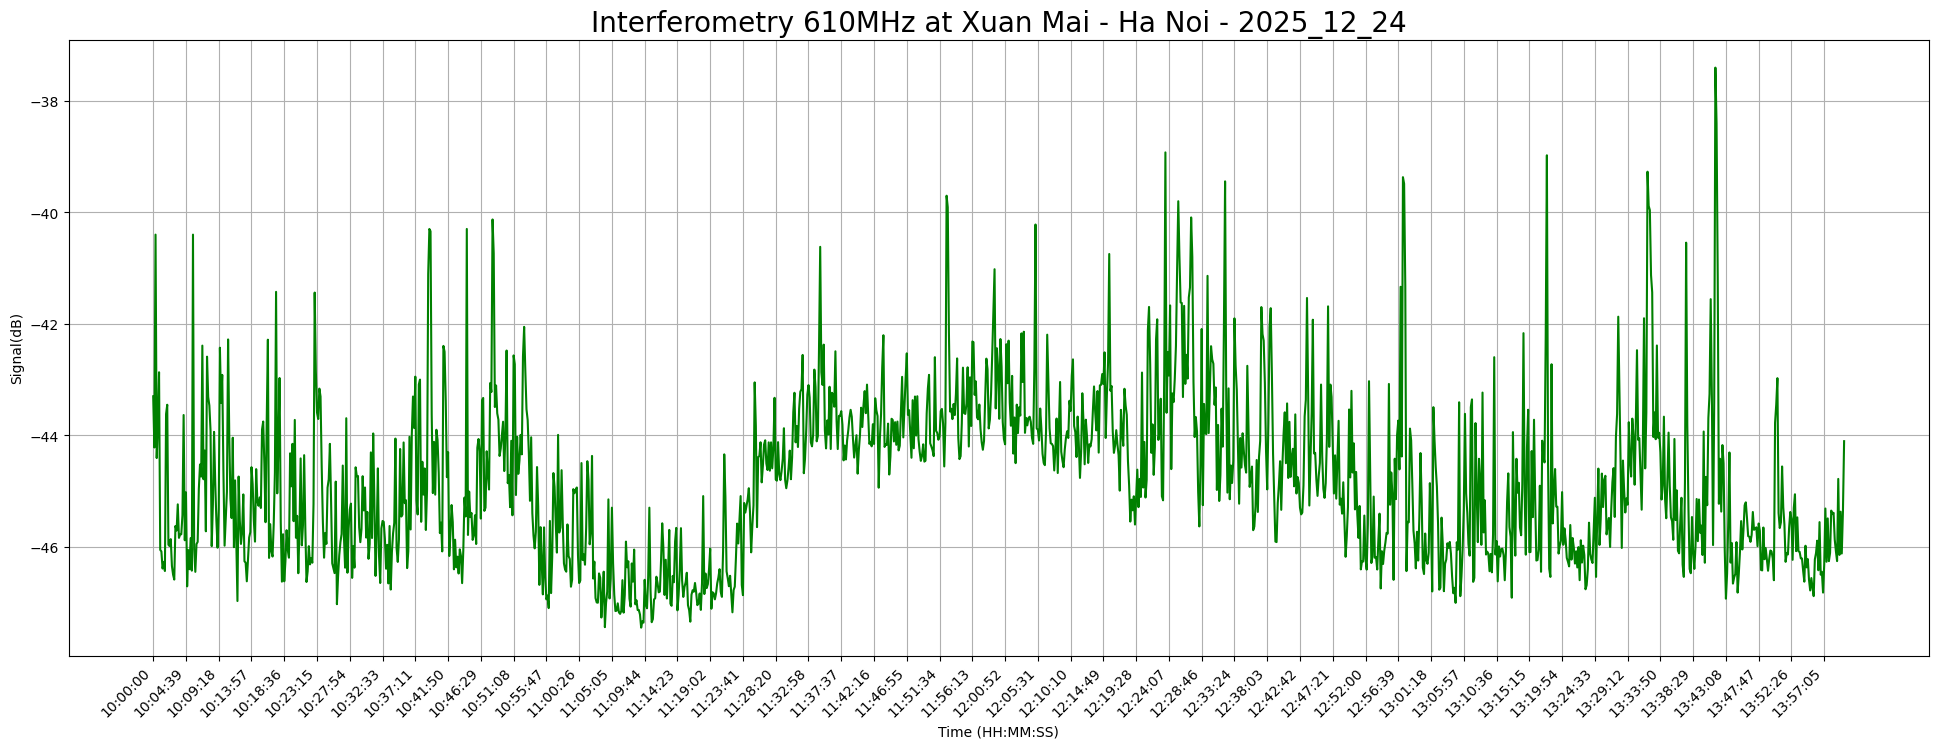

In [24]:
fig, ax = plt.subplots(1, 1, figsize = [24, 8])
ax.set_title(f'Interferometry 610MHz at Xuan Mai - Ha Noi - {data_date}', fontsize=20)
ax.set(xlabel = 'Time (HH:MM:SS)', ylabel = 'Signal(dB)')
ax.grid()

# Vẽ đồ thị theo chỉ số (index) để dễ căn chỉnh nhãn
x_index = np.arange(len(power_list))
ax.plot(x_index, power_list, color = 'green', linestyle = '-')

# Thiết lập nhãn trục x hiển thị thời gian
# Chọn bước nhảy (step) để không bị chồng chéo chữ (ví dụ: hiển thị khoảng 20 mốc thời gian)
num_ticks = 50
step = max(1, len(time1_list) // num_ticks)

ax.set_xticks(x_index[::step])
ax.set_xticklabels(np.array(time1_list)[::step], rotation=45, ha='right')

plt.show()

In [25]:
def remove_spike(x, threshold=3, window_size=11):
    """
    Remove spikes from the x-axis.

    Parameters:
    x (numpy array): The x-axis to remove spikes from.
    threshold (float): The threshold to define spikes. Default value is 3.
    window_size (int): The size of the window to calculate the average. Default value is 11.

    Returns:
    x_smooth (numpy array): The x-axis with spikes removed.
    """
    # Calculate the mean of x
    x_mean = np.mean(x)

    # Calculate the standard deviation of x
    x_std = np.std(x)

    # Finding the indices of spikes
    spike = np.abs(x - x_mean) > threshold * x_std

    # Removing the spike
    x_smooth = np.copy(x)
    x_smooth[spike] = np.mean(x[~spike])

    # Using linear interpolation
    # x_smooth[spike] = np.interp(np.where(spike)[0], np.where(~spike)[0], x[~spike])           # Bad

    # Using Savitzky-Golay filter
    # x_smooth = signal.savgol_filter(x_smooth, window_size, 3)                                 # Dependence on Threshold

    # Using convolution
    x_smooth = np.convolve(x, np.ones(window_size)/window_size, mode='same')                    # Good

    return x_smooth


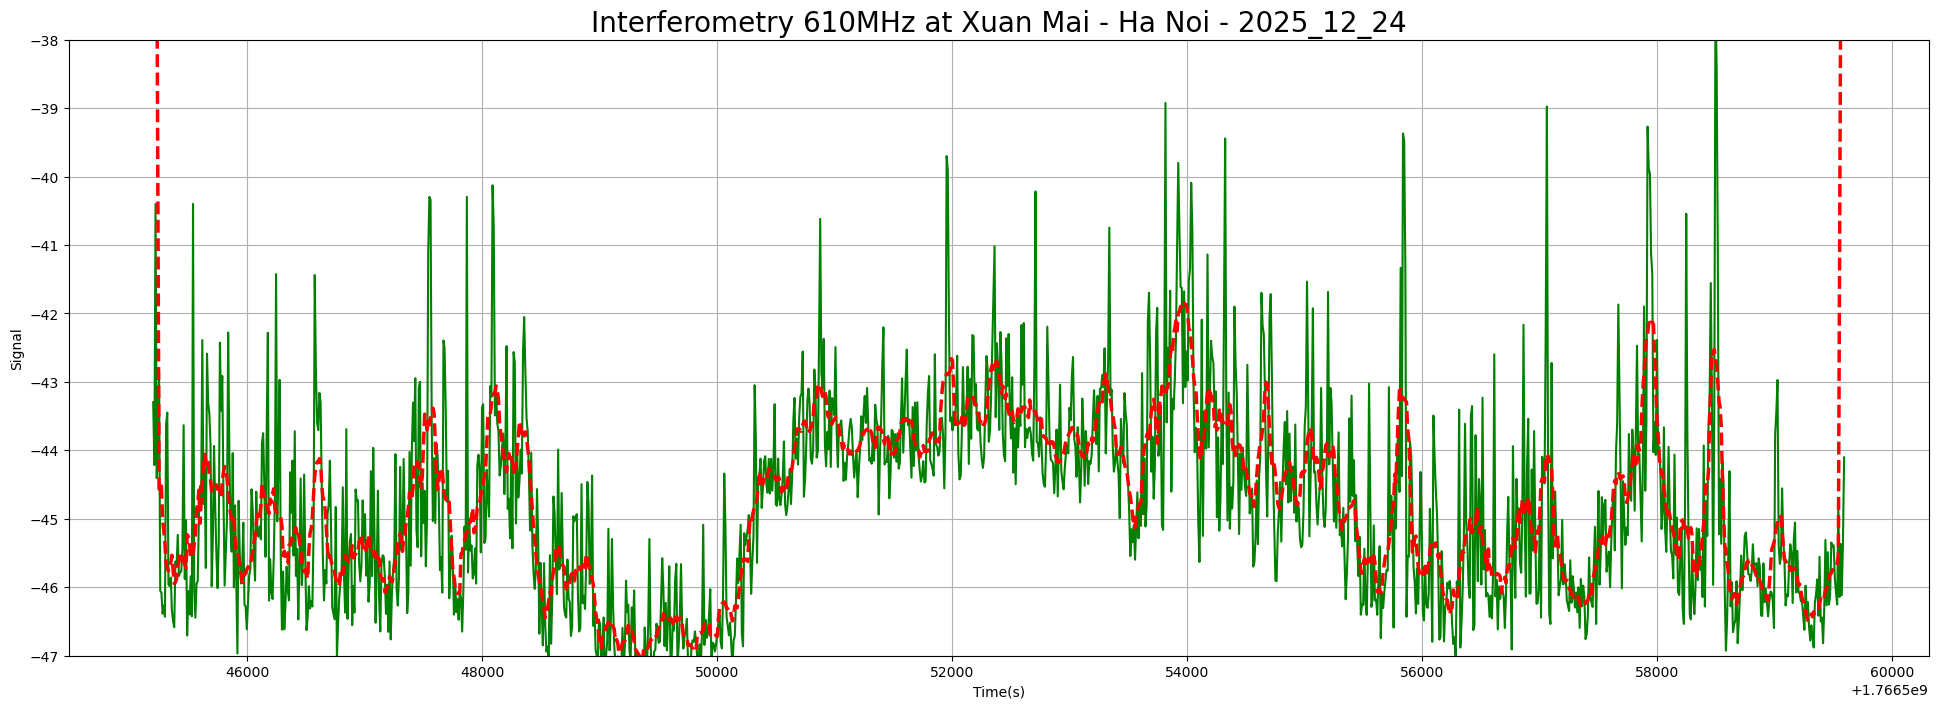

In [26]:
power_1 = remove_spike(power_list, threshold=3, window_size=11)

fig, ax_1 = plt.subplots(1, 1, figsize = [24, 8])
ax_1.set_title(f'Interferometry 610MHz at Xuan Mai - Ha Noi - {data_date}', fontsize=20)
ax_1.set(xlabel = 'Time(s)', ylabel = 'Signal')
ax_1.plot(time_list, power_list, color = 'green', linestyle = '-')
ax_1.plot(time_list, power_1, color = 'red', linestyle = '--', linewidth = 2.5)
ax_1.set_ylim(-47, -38)
ax_1.grid()
plt.show()


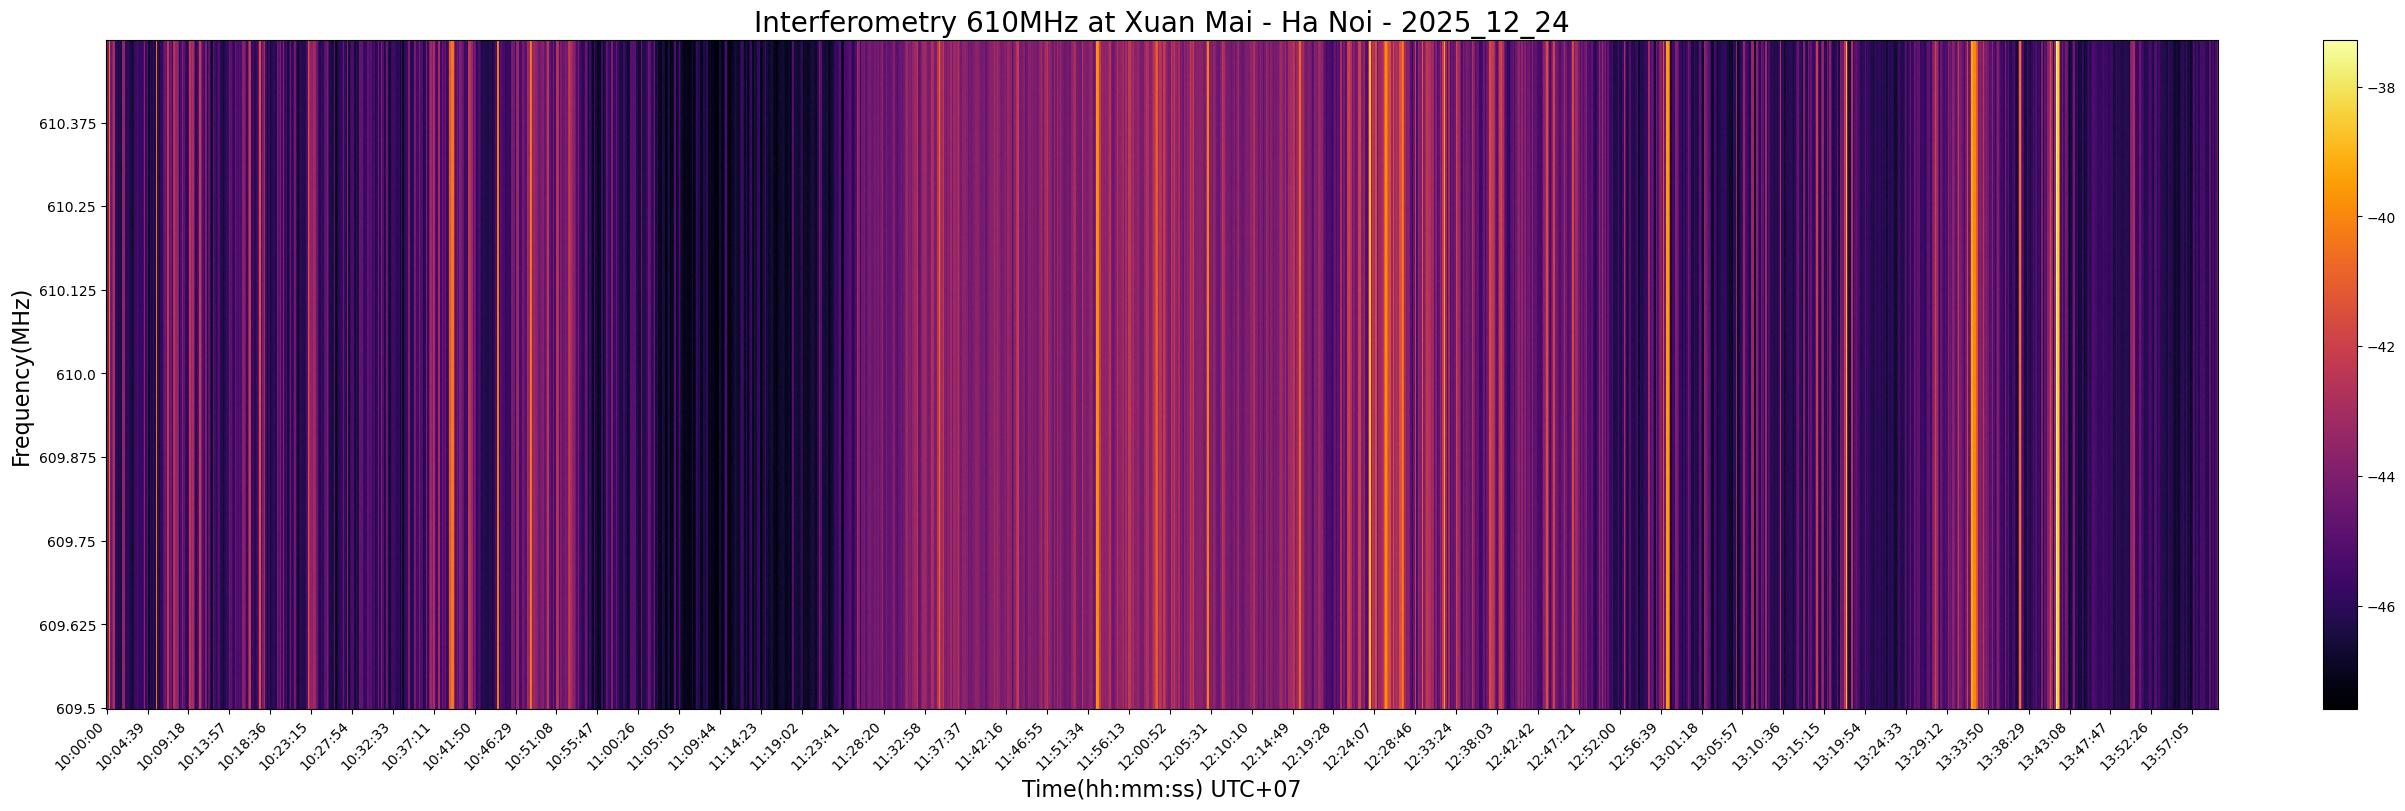

In [27]:
fig, ax_2 = plt.subplots(1, 1, figsize = [24, 8], layout = 'constrained')
ax_2.set_title(f'Interferometry 610MHz at Xuan Mai - Ha Noi - {data_date}', fontsize=20)
ax_2.set_xlabel('Time(hh:mm:ss) UTC+07', fontsize=16)
ax_2.set_ylabel('Frequency(MHz)', fontsize=16)
plt.imshow(data_matrix, cmap = 'inferno', interpolation = 'nearest', aspect = 'auto', origin = 'lower')
x = np.arange(0, len(time1_list))
plt.xticks(x[::len(time1_list)//50], time1_list[::len(time1_list)//50], rotation=45, ha='right')
y = np.arange(0, 512)
plt.yticks(y[::len(Frequency)//8], Frequency[::len(Frequency)//8], rotation=0, ha='right')
plt.colorbar()
plt.show()